# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

if not os.path.exists("output_data"):
    os.makedirs("output_data")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | taroa
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | tuy hoa
Processing Record 7 of Set 1 | san-pedro
Processing Record 8 of Set 1 | remire-montjoly
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | sola
Processing Record 13 of Set 1 | katsuren-haebaru
Processing Record 14 of Set 1 | koryazhma
Processing Record 15 of Set 1 | kalix
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | nuuk
Processing Record 19 of Set 1 | sao vicente
Processing Record 20 of Set 1 | broken hill
Processing Record 21 of Set 1 | acapulco de juarez
Processing Record 22 of Set 1 | puerto san carlos
City not found.

Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | hadibu
Processing Record 41 of Set 4 | port mathurin
Processing Record 42 of Set 4 | archangelos
Processing Record 43 of Set 4 | waddan
Processing Record 44 of Set 4 | retreat
Processing Record 45 of Set 4 | kouroussa
Processing Record 46 of Set 4 | tralee
Processing Record 47 of Set 4 | la passe
Processing Record 48 of Set 4 | chonchi
Processing Record 49 of Set 4 | toamasina
Processing Record 0 of Set 5 | san antonio de pale
Processing Record 1 of Set 5 | sinazongwe
Processing Record 2 of Set 5 | alibag
Processing Record 3 of Set 5 | levuka
Processing Record 4 of Set 5 | happy valley-goose bay
Processing Record 5 of Set 5 | holualoa
Processing Record 6 of Set 5 | guarapari
Processing Record 7 of Set 5 | crane
Processing Record 8 of Set 5 | baiyin
Processing Record 9 of Set 5 | inhambane
Processing Record 10 of Set 5 | lapeer
Processing Record 11 of Set 5 | cabo san lucas
Processing Record 12 of Set 5 | hopelchen


Processing Record 31 of Set 8 | berdigestyakh
Processing Record 32 of Set 8 | fortuna
Processing Record 33 of Set 8 | guangyuan
Processing Record 34 of Set 8 | minas de marcona
Processing Record 35 of Set 8 | leava
Processing Record 36 of Set 8 | dunedin
Processing Record 37 of Set 8 | kenora
Processing Record 38 of Set 8 | natal
Processing Record 39 of Set 8 | aleksandrov gay
Processing Record 40 of Set 8 | pampas
Processing Record 41 of Set 8 | zonguldak
Processing Record 42 of Set 8 | tarazona
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | kourou
Processing Record 45 of Set 8 | nouadhibou
Processing Record 46 of Set 8 | horta
Processing Record 47 of Set 8 | glace bay
Processing Record 48 of Set 8 | zholymbet
Processing Record 49 of Set 8 | al kut
Processing Record 0 of Set 9 | broceni
Processing Record 1 of Set 9 | gisborne
Processing Record 2 of Set 9 | yangor
City not found. Skipping...
Processing Record 3 of Set 9 | guerrero negro
Processing Record 4 of Set

Processing Record 22 of Set 12 | bel ombre
Processing Record 23 of Set 12 | balabac
Processing Record 24 of Set 12 | prado del rey
Processing Record 25 of Set 12 | christchurch
Processing Record 26 of Set 12 | santa coloma de farners
Processing Record 27 of Set 12 | alto araguaia
Processing Record 28 of Set 12 | casas grandes
Processing Record 29 of Set 12 | bathsheba
Processing Record 30 of Set 12 | leh
Processing Record 31 of Set 12 | lignano sabbiadoro
Processing Record 32 of Set 12 | forster
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,76.51,84,56,11.05,PN,1707262922
1,hasaki,35.7333,140.8333,39.29,51,89,15.41,JP,1707262922
2,taroa,8.7058,171.2275,81.39,75,99,16.67,MH,1707262922
3,albany,42.6001,-73.9662,32.34,71,5,2.84,US,1707262760
4,papatowai,-46.5619,169.4708,61.95,51,46,11.56,NZ,1707262923


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,75.56,84,98,8.72,PN,1707194188
1,grytviken,-54.2811,-36.5092,43.97,92,40,16.40,GS,1707193904
2,port-aux-francais,-49.3500,70.2167,42.58,74,100,28.32,TF,1707194196
3,orkney,-26.9802,26.6727,68.72,24,0,1.88,ZA,1707194580
4,kiama,-34.6833,150.8667,69.01,92,100,5.01,AU,1707194580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

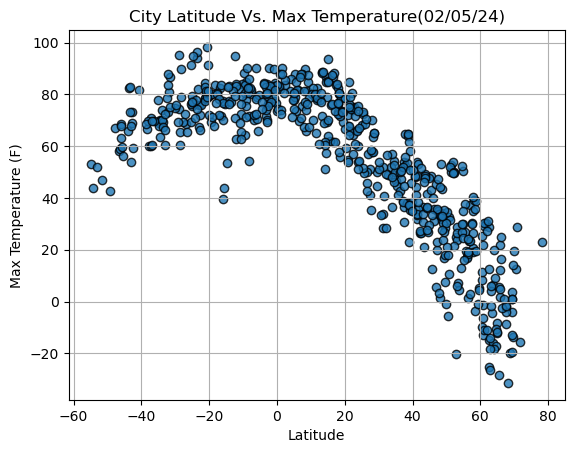

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

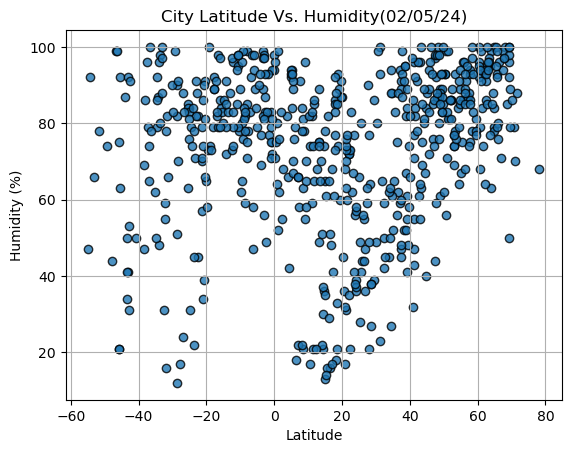

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

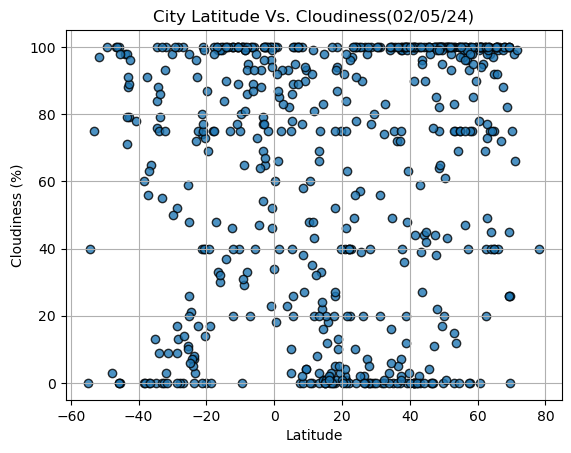

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

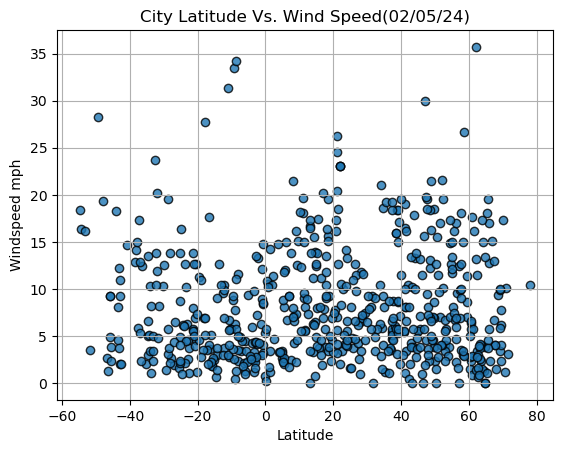

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [4]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hasaki,35.7333,140.8333,39.29,51,89,15.41,JP,1707262922
2,taroa,8.7058,171.2275,81.39,75,99,16.67,MH,1707262922
3,albany,42.6001,-73.9662,32.34,71,5,2.84,US,1707262760
5,tuy hoa,13.0833,109.3000,74.21,91,50,1.79,VN,1707262923
6,san-pedro,4.7485,-6.6363,81.41,77,3,6.02,CI,1707262924


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,76.51,84,56,11.05,PN,1707262922
4,papatowai,-46.5619,169.4708,61.95,51,46,11.56,NZ,1707262923
8,grytviken,-54.2811,-36.5092,47.91,62,8,4.63,GS,1707262924
9,bredasdorp,-34.5322,20.0403,68.56,63,5,13.82,ZA,1707262924
11,sola,-13.8833,167.5500,82.99,76,73,18.12,VU,1707262725


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8567066088744131


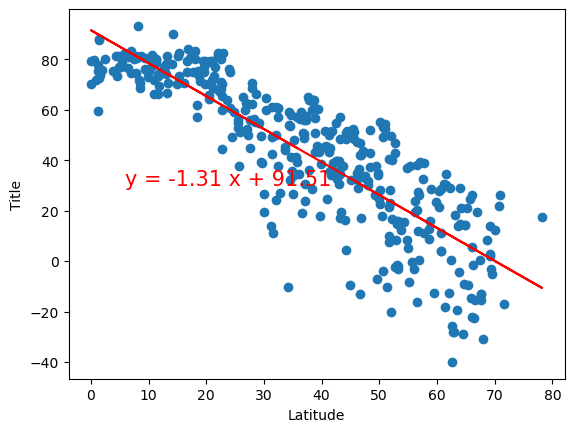

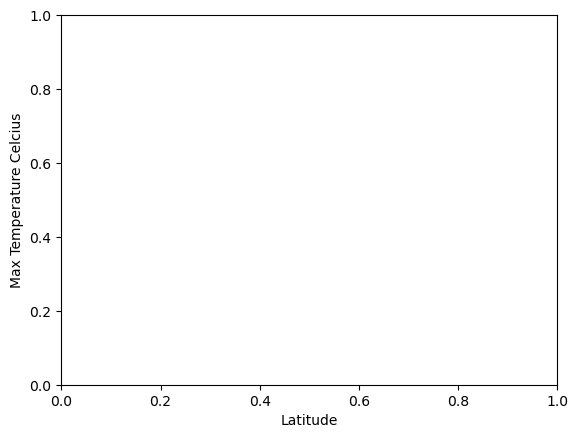

In [12]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

The r-squared is: 0.4352306350733318


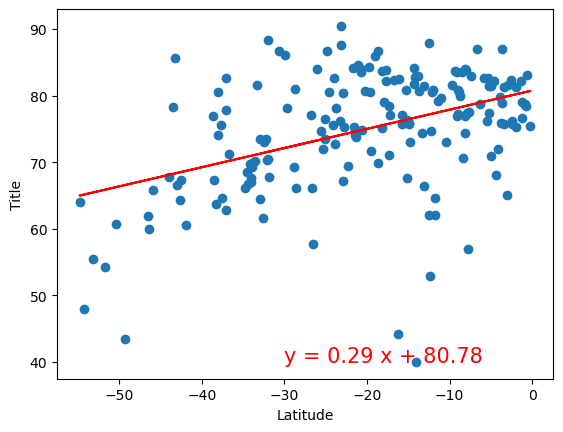

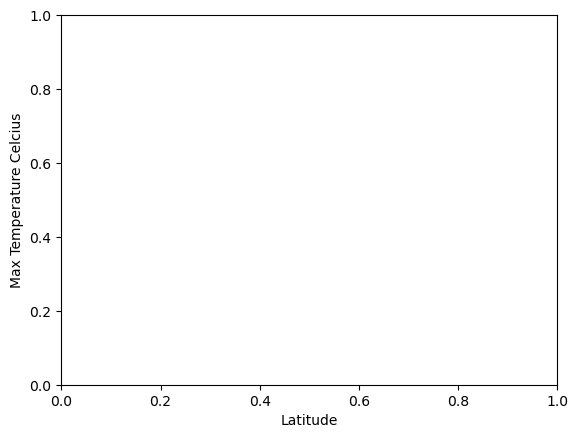

In [13]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

**Discussion about the linear relationship:** As the latitude moves closer to 0, the equator, the temperature rises. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4080040575109659


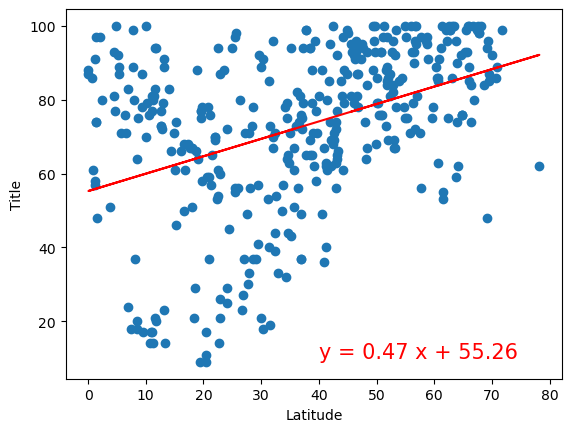

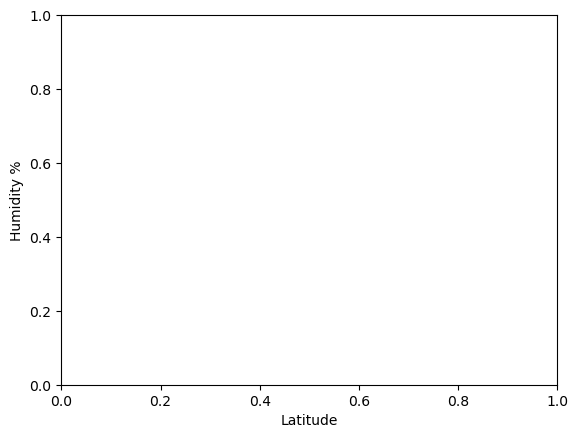

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

The r-squared is: 0.38314321510296123


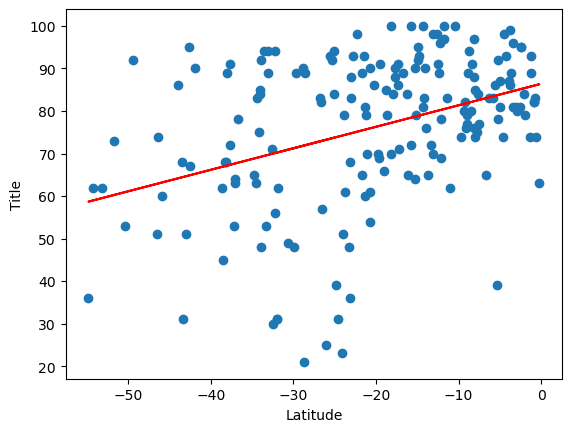

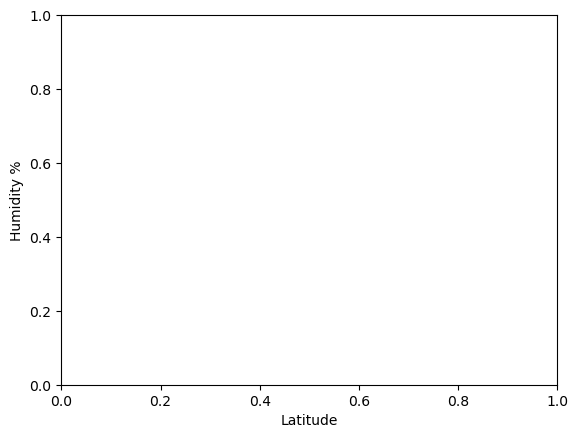

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** As the latitude approaches 0, the equator, humidity increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3646094104693818


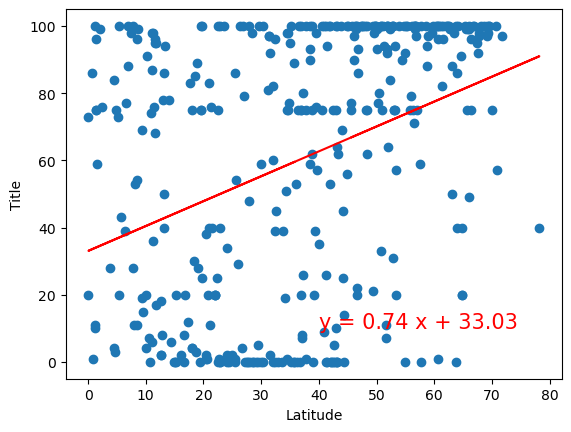

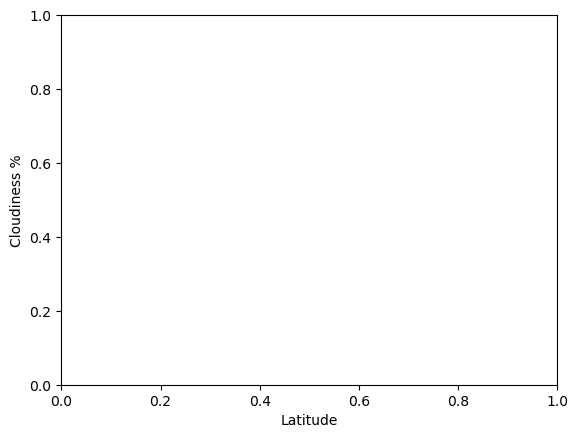

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

The r-squared is: 0.2856193871004952


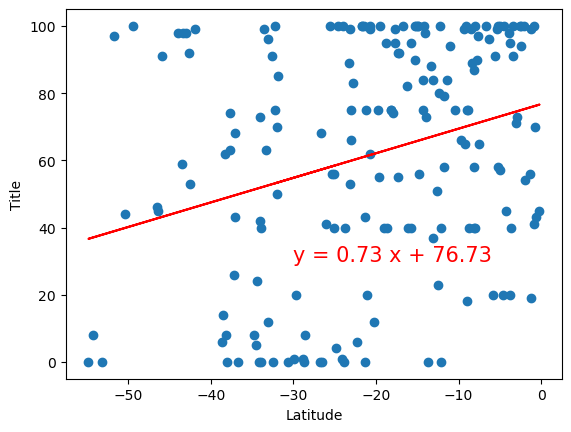

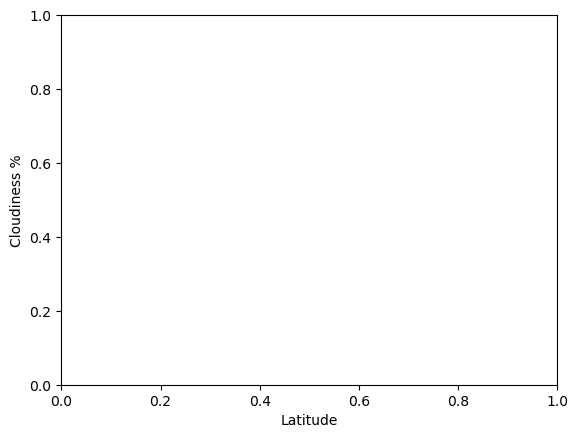

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** As the latitude gets farther away from 0, the equator, cloudiness increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05548444011356638


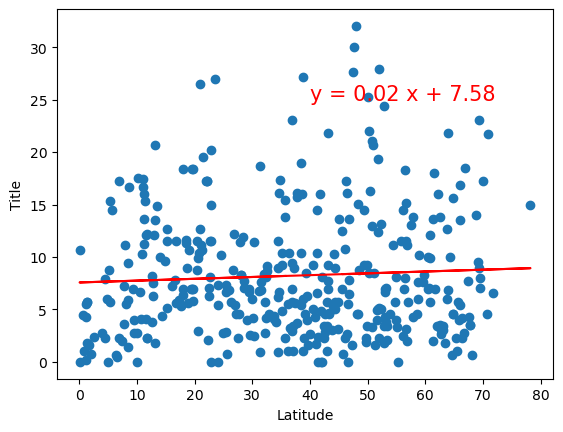

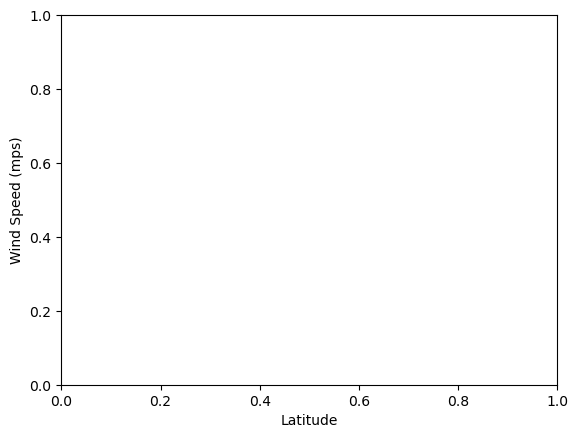

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

The r-squared is: -0.18043721168504168


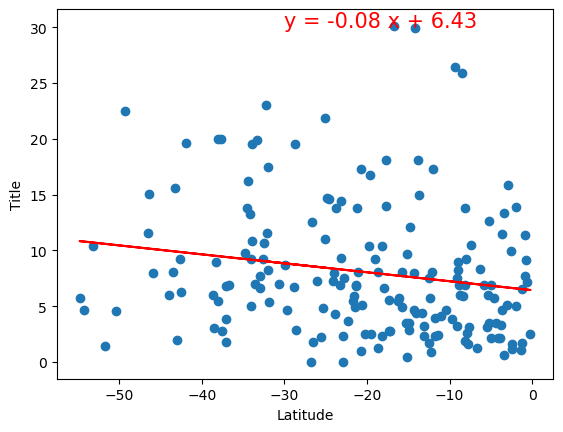

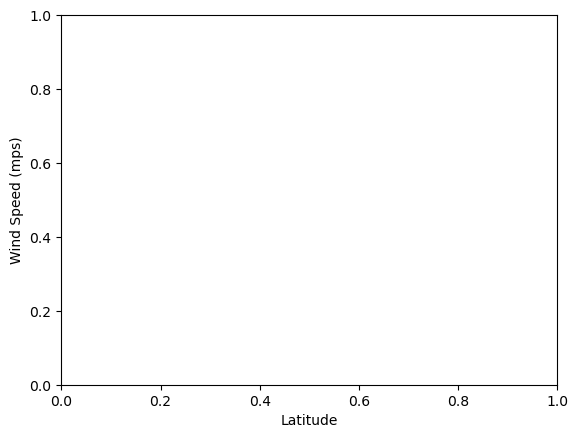

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

**Discussion about the linear relationship:** As latitude increases away from 0, the equator, wind speeds increase.